### Introduction
This Notebook implements a support vector machine classifier and combines different encoding and balancing approaches, aiming to identify the combination on which the SVM-classifier performes best. In addition, a parameter optimization is conducted by means of a GridSearch.

In [3]:
# imports 
from preprocessing.preprocessing_one_hot_encoding import *
from preprocessing.preprocessing_label_encoding import *

from visualization.classification_plots import *
from visualization.general_plots import *

from sklearn.svm import LinearSVC
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

approach_list = []
acc_list = []
cm_list = []
cr_list = []

In [2]:
# Evaluation function that calculates and returns evaluation metrics and stores them for later comparison.
def evaluation(target_test, test_predictions, approach):
    approach_list.append(approach)
    acc = metrics.accuracy_score(target_test, test_predictions)
    acc_list.append(acc)
    cm = metrics.confusion_matrix(target_test, test_predictions)
    cm_list.append(cm)
    cr = metrics.classification_report(target_test, test_predictions)
    cr_list.append(cr)
    return "Accuracy of {}: {}".format(approach, acc), plot_confusion_matrix(cm, target_test.Diabetes.unique().tolist())

The following encoding approaches are available:
- Label Encoding (original labels from the initial dataset, refer to the 'Columns.xlsx' for further information)
- One Hot Encoding - Simple (all columns with ordinal values that are not simply yes/no are one hot encoded)
- One Hot Encoding - All (all columns with ordinal values are one hot encoded, including yes/no columns)
    - The one hot encoding is also available for the target dataset if prefered. 

Due to a considerable class imbalance (refer to preprocessing.ipynb), each encoding approach is additionaly available with oversampling or undersampling.

In the following, all three encoding approaches combined with no sampling and undersampling will be used to train and test a LinearSVC classifier by means of a train/test split provided by the respective preprocessing. The target dataset was not one hot encoded for this experiment. In order to maintain a feasible computational effort in regards to the available environment, the **max_iter** parameter of the LinearSVC was set to 500.



### 1.1  Label Encoding + no sampling

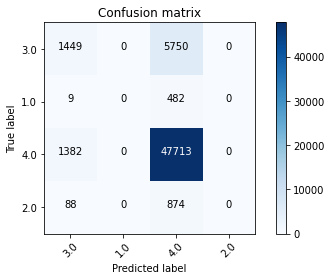

Accuracy of Label Encoding - No Sampling: 0.8513342684468457


In [9]:
#load data
data_train, data_test, target_train, target_test = get_preprocessed_brfss_dataset_label_encoded_train_test_split()

#create and train SVM, then predict
svm = LinearSVC(max_iter=500)
svm.fit(data_train, target_train.values.ravel())
test_predictions = svm.predict(data_test)

#evaluate
print(evaluation(target_test, test_predictions, "Label Encoding - No Sampling")[0])

### 1.2 Label Encoding + undersampling

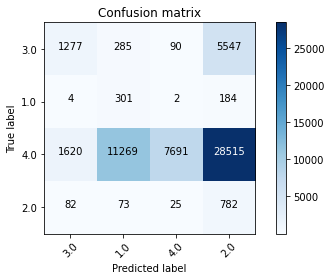

Accuracy of Label Encoding - Undersampled: 0.17405233172286005


In [10]:
#load data
data_train, data_test, target_train, target_test = get_preprocessed_brfss_dataset_label_encoded_train_test_split_undersampled()

#create and train SVM, then predict
svm = LinearSVC(max_iter=500)
svm.fit(data_train, target_train.values.ravel())
test_predictions = svm.predict(data_test)

#evaluate
print(evaluation(target_test, test_predictions, "Label Encoding - Undersampled")[0])

### 2.1 One Hot Encoding (Simple) + no sampling

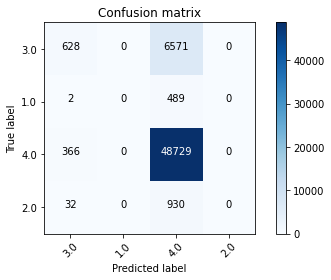

Accuracy of One Hot Encoding - Simple - No Sampling: 0.8547110672415883


In [11]:
#load data
data_train, data_test, target_train, target_test = get_preprocessed_brfss_dataset_one_hot_encoded_train_test_split()

#create and train SVM, then predict
svm = LinearSVC(max_iter=500)
svm.fit(data_train, target_train.values.ravel())
test_predictions = svm.predict(data_test)

#evaluate
print(evaluation(target_test, test_predictions, "One Hot Encoding - Simple - No Sampling")[0])

### 2.2 One Hot Encoding (Simple) + undersampling

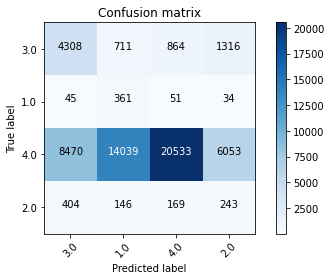

Accuracy of One Hot Encoding - Simple - Undersampled: 0.44062895042166694


In [12]:
#load data
data_train, data_test, target_train, target_test = get_preprocessed_brfss_dataset_one_hot_encoded_train_test_split_undersampled()

#create and train SVM, then predict
svm = LinearSVC(max_iter=500)
svm.fit(data_train, target_train.values.ravel())
test_predictions = svm.predict(data_test)

#evaluate
print(evaluation(target_test, test_predictions, "One Hot Encoding - Simple - Undersampled")[0])

### 3.1 One Hot Encoding (All) + no sampling

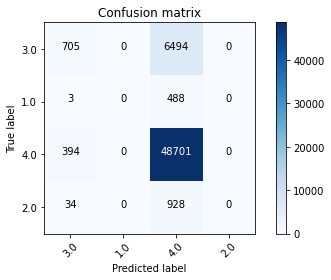

Accuracy of One Hot Encoding - All - No Sampling: 0.855559596169498


In [13]:
#load data
data_train, data_test, target_train, target_test = get_preprocessed_brfss_dataset_one_hot_encoded_all_columns_train_test_split()

#create and train SVM, then predict
svm = LinearSVC(max_iter=500)
svm.fit(data_train, target_train.values.ravel())
test_predictions = svm.predict(data_test)

#evaluate
print(evaluation(target_test, test_predictions, "One Hot Encoding - All - No Sampling")[0])

### 3.2 One Hot Encoding (All) + undersampling

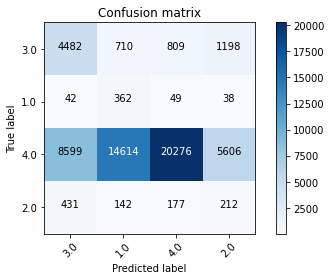

Accuracy of One Hot Encoding - All - Undersampled: 0.43867213881240585


In [14]:
#load data
data_train, data_test, target_train, target_test = get_preprocessed_brfss_dataset_one_hot_encoded_all_columns_train_test_split_undersampled()

#create and train SVM, then predict
svm = LinearSVC(max_iter=500)
svm.fit(data_train, target_train.values.ravel())
test_predictions = svm.predict(data_test)

#evaluate
print(evaluation(target_test, test_predictions, "One Hot Encoding - All - Undersampled")[0])

### Comparison

In [18]:
for approach in approach_list:
    print ("Accuracy - {}: {}".format(approach, acc_list[approach_list.index(approach)]))
    print(cr_list[approach_list.index(approach)])

Accuracy - Label Encoding - No Sampling: 0.8513342684468457
              precision    recall  f1-score   support

         1.0       0.49      0.20      0.29      7199
         2.0       0.00      0.00      0.00       491
         3.0       0.87      0.97      0.92     49095
         4.0       0.00      0.00      0.00       962

    accuracy                           0.85     57747
   macro avg       0.34      0.29      0.30     57747
weighted avg       0.80      0.85      0.82     57747

Accuracy - Label Encoding - Undersampled: 0.17405233172286005
              precision    recall  f1-score   support

         1.0       0.43      0.18      0.25      7199
         2.0       0.03      0.61      0.05       491
         3.0       0.99      0.16      0.27     49095
         4.0       0.02      0.81      0.04       962

    accuracy                           0.17     57747
   macro avg       0.37      0.44      0.15     57747
weighted avg       0.89      0.17      0.26     57747

Accuracy

The comparison shows that, of all applied encoding approaches, the SVM classifier achieves the best accuracy 
with the dataset using **One Hot Encoding on all ordinal columns without sampling** of **85.55%**.

Focussing on the F1-scores, the **Label Encoding without sampling** approach shows the best results with **0.30 (0.82 weighted)**.

### Parameter Optimization


In [5]:
# load data
data_train, data_test, target_train, target_test = get_preprocessed_brfss_dataset_one_hot_encoded_all_columns_train_test_split()

We want to optimize the following parameters:
- **C**: the regularization parameter that controls the trade-off between the slack variable penalty (misclassifications) and width of the margin. A higher value results in the optimization choosing a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Default = 1.0
- **max_iter**: the maximum number of iterations to be run. Default = 1000

In [ ]:
# try different parameter combinations
for c in [0.01, 0.1, 10, 100, 1000]:
    for iter in [200, 500, 1000, 1500, 2000]:
        svm = LinearSVC(C=c, max_iter=iter)
        svm.fit(data_train,target_train.values.ravel())
        test_predictions = svm.predict(data_test)
        print('Accuracy for C = {} and max_iter = {}: {}'.format(c, iter, metrics.accuracy_score(target_test, test_predictions)))

Of the 25 parameter combinations tested, the LinearSVC achieves the best accuracy of **TODO** with **TODO**.